In [52]:
import pandas as pd
from matplotlib import pyplot as plt
from toolz.functoolz import pipe
import os 

In [53]:
%run -i "preprocess_lang.ipynb"
%run -i "preprocess_nolang.ipynb"

In [54]:
df = pd.read_json('dataset/jsonl/en-US.jsonl', lines=True)

#for json_file in os.listdir('dataset/jsonl'):
#    df = pd.concat([df, pd.read_json('dataset/jsonl/' + json_file, lines=True)], ignore_index=True)
#    print(f"Added {json_file} to dataframe")

In [55]:
df = df[df['locale'] == 'en-US']

In [56]:
df = pipe(df, remove_punctuation, lowercase, tokenize)

In [57]:
df['utt'] = df['utt'].apply(lambda x: " ".join(x))

In [58]:
df["locale"] = df["locale"].apply(lambda x: x.split("-")[0])

In [59]:
df.head()

,id,locale,partition,scenario,intent,utt,annot_utt,worker_id,utt_text
0,0,en,test,alarm,alarm_set,wake me up at five am this week,wake me up at [time : five am] [date : this week],1,"(w, a, k, e, , m, e, , u, p, , a, t, , f, ..."
1,1,en,train,alarm,alarm_set,wake me up at nine am on friday,wake me up at [time : nine am] on [date : friday],1,"(w, a, k, e, , m, e, , u, p, , a, t, , n, ..."
2,2,en,train,alarm,alarm_set,set an alarm for two hours from now,set an alarm for [time : two hours from now],1,"(s, e, t, , a, n, , a, l, a, r, m, , f, o, ..."
3,3,en,test,audio,audio_volume_mute,quiet,quiet,1,"(q, u, i, e, t)"
4,4,en,train,audio,audio_volume_mute,olly quiet,olly quiet,1,"(o, l, l, y, , q, u, i, e, t)"


In [60]:
def get_corpus(df):
    return df["utt"].tolist()


get_corpus(df)

['wake me up at five am this week',
 'wake me up at nine am on friday',
 'set an alarm for two hours from now',
 'quiet',
 'olly quiet',
 'stop',
 'olly pause for ten seconds',
 'pause for ten seconds',
 'pink is all we need',
 'make the lighting bit more warm here',
 'please set the lighting suitable for reading',
 'turn the lights off please',
 'time to sleep',
 'time to sleep olly',
 'and the darkness has fallen',
 'turn off the light in the bathroom',
 'olly dim the lights in the hall',
 'dim the lights in the hall',
 'turn the lights off in the bedroom',
 'olly turn the lights off in the bedroom',
 'set lights to twenty percent',
 'olly set lights to twenty percent',
 'dim the lights in the kitchen olly',
 'dim the lights in the kitchen',
 'make a room darker',
 'olly clean the flat',
 'clean the flat',
 'its dirty here make some noise',
 'vacuum the house',
 'vacuum the house olly',
 'cleaning is good dust is so bad do now your magic clean my carpet',
 'hoover the hallway',
 'hoo

In [61]:
print("Scenarios:")
print(df["scenario"].unique())

print("\nIntents:")
print(df["intent"].unique())

Scenarios:
['alarm' 'audio' 'iot' 'calendar' 'play' 'general' 'datetime' 'takeaway'
 'news' 'music' 'weather' 'qa' 'social' 'recommendation' 'cooking'
 'transport' 'email' 'lists']

Intents:
['alarm_set' 'audio_volume_mute' 'iot_hue_lightchange' 'iot_hue_lightoff'
 'iot_hue_lighton' 'iot_hue_lightdim' 'iot_cleaning' 'calendar_query'
 'play_music' 'general_quirky' 'general_greet' 'datetime_query'
 'datetime_convert' 'takeaway_query' 'alarm_remove' 'alarm_query'
 'news_query' 'music_likeness' 'music_query' 'iot_hue_lightup'
 'takeaway_order' 'weather_query' 'music_settings' 'audio_volume_down'
 'general_joke' 'music_dislikeness' 'audio_volume_other' 'iot_coffee'
 'audio_volume_up' 'iot_wemo_on' 'iot_wemo_off' 'qa_stock' 'play_radio'
 'social_post' 'recommendation_locations' 'cooking_recipe' 'qa_factoid'
 'recommendation_events' 'calendar_set' 'play_audiobook' 'play_podcasts'
 'social_query' 'transport_query' 'email_sendemail' 'transport_ticket'
 'recommendation_movies' 'lists_query' 'pla

In [62]:
fig, ax = plt.subplots()

fig.set_figwidth(20)
fig.set_dpi(800)

ax.bar(df["scenario"].unique(), df["scenario"].value_counts(), color="#9179FA")
ax.set_title("Scenario Distribution")
ax.set_xlabel("Scenario")
ax.set_ylabel("Count")

plt.style.use("dark_background")
plt.xticks(rotation=90)
plt.show()

In [63]:
fig, ax = plt.subplots()

fig.set_figwidth(20)
fig.set_dpi(800)

ax.bar(df["intent"].unique(), df["intent"].value_counts(), color="#9179FA")
ax.set_title("Intent Distribution")
ax.set_xlabel("Intent")
ax.set_ylabel("Count")

plt.style.use("dark_background")
plt.xticks(rotation=90)
plt.show()

In [64]:

from wordcloud import WordCloud


def create_word_cloud(contents):
    wordclouds = [WordCloud().generate(" ".join(content)) for content in contents]
    
    fig = plt.figure(figsize=(6 * len(contents), 6))
    for i,content in enumerate(contents):
        ax = fig.add_subplot(1, len(contents), i+1)
        ax.imshow(wordclouds[i])
        ax.axis("off")
        
    plt.show()

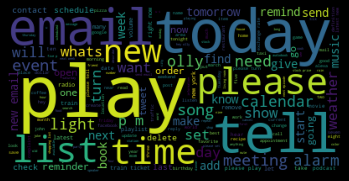

In [65]:
create_word_cloud([get_corpus(df)])

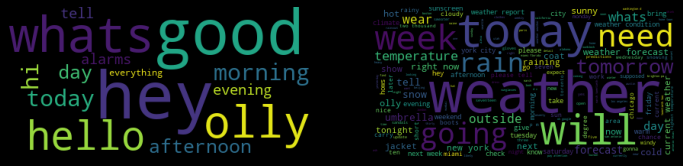

In [66]:
# for MultinomialNB and according to confusion matrix for en
#   - general_greet -> weather_query
#   - music_dislikeness/music_settings -> play_music
#  were intents often misclassified

create_word_cloud([
    get_corpus(df[df["intent"] == "general_greet"]),
    get_corpus(df[df["intent"] == "weather_query"])
])

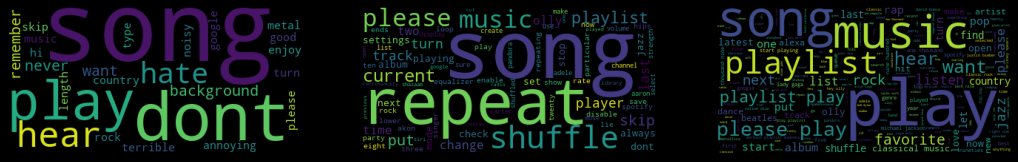

In [67]:
create_word_cloud([
    get_corpus(df[df["intent"] == "music_dislikeness"]),
    get_corpus(df[df["intent"] == "music_settings"]),
    get_corpus(df[df["intent"] == "play_music"])
])